# Perceptron Model

In [78]:
import numpy as np

class Perceptron():
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self.unit_step_function
        self.weights = None
        self.bias = None
        
    def fit(self, X, y): # Gets training samples and training labels as its input
        n_samples, n_features = X.shape
        
        # init weights
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Convert all values of y to 0 or 1, if it is not already the case. List comprehension is used.
        y_ = np.array([1 if i>0 else 0 for i in y]) 
        
#         for i in range(self.n_iters):
#             linear_output = np.dot(self.weights, X[i]) + self.bias
#             y_predicted = self.activation_func(linear_output)
            
#             update = self.lr * (y[i] - y_predicted)
#             self.weights = self.weights + update * X[i]
#             self.bias = self.bias + update
            
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                update = self.lr * (y_[idx] - y_predicted)
                self.weights = self.weights + update * x_i
                self.bias = self.bias + update

        
        
    
    def predict(self, X): # Gets test samples
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
        
        
    def unit_step_function(self, x):
        return np.where(x>=0, 1, 0)

# PM1

In [88]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred)/len(y_true)
    return accuracy

df = pd.read_csv('data_clean.csv', index_col=False)
df.drop('id',axis=1, inplace=True)
df.drop('Unnamed: 0',axis=1, inplace=True)

#Assign predictors to a variable of ndarray (matrix) type
array = df.values
X = array[:,1:31]
y = array[:,0]

#transform the class labels from their original string representation (M and B) into integers - Label Encoding
for i in range(569):
    if y[i]=='M':
        y[i] = 1
    if y[i]=='B':
        y[i] = 0
        
df.iloc[:,0] = y

##Split data set in train 67% and test 33%
def sample_first_prows(data, perc=0.67):
    return data.head(int(len(data)*(perc))).values

array = sample_first_prows(df)
X_train = array[:,1:31]
y_train = array[:,0]
X_test = df.iloc[len(X_train):,1:31]
y_test = df.iloc[len(y_train):,0]

##Split data set in train 67% and test 33%
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((381, 30), (381,), (188, 30), (188,))

Perceptron classification accuracy:  0.9361702127659575


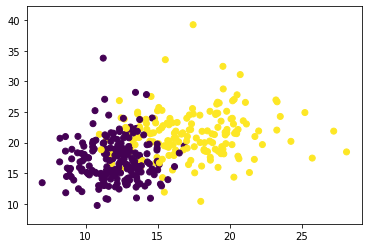

In [81]:
p = Perceptron(learning_rate=0.01, n_iters=40000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy: ", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()

# PM2

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred)/len(y_true)
    return accuracy

df = pd.read_csv('data_clean.csv', index_col=False)
df.drop('id',axis=1, inplace=True)
df.drop('Unnamed: 0',axis=1, inplace=True)

#Assign predictors to a variable of ndarray (matrix) type
array = df.values
X = array[:,1:31]
y = array[:,0]

#transform the class labels from their original string representation (M and B) into integers - Label Encoding
for i in range(569):
    if y[i]=='M':
        y[i] = 1
    if y[i]=='B':
        y[i] = 0
        
df.iloc[:,0] = y

##Split data set in train 67% and test 33%
def sample_first_prows(data, perc=0.67):
    return data.head(int(len(data)*(perc))).values

# Shuffle training examples
array = sample_first_prows(df)
array = pd.DataFrame(array)
array = array.sample(frac=1)
X_train = array.iloc[:,1:31]
y_train = array.iloc[:,0]
X_test = df.iloc[len(X_train):,1:31]
y_test = df.iloc[len(y_train):,0]

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((381, 30), (381,), (188, 30), (188,))

Perceptron classification accuracy:  0.9468085106382979


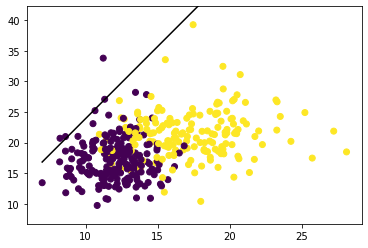

In [90]:
p = Perceptron(learning_rate=0.01, n_iters=15000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy: ", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()

# PM3